In [1]:
!pip install wordcloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import pickle

with open("newsgroups", "rb") as f:
    newsgroup_data = pickle.load(f)


In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def preprocess(doc):
    tokens = word_tokenize(doc.lower())
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    return ' '.join(tokens)

cleaned_docs = [preprocess(doc) for doc in newsgroup_data]


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
#Vectorization (TF-IDF and Count)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(cleaned_docs)

count_vectorizer = CountVectorizer(max_features=1000)
count = count_vectorizer.fit_transform(cleaned_docs)


In [6]:
#Apply LDA and NMF (10 topics)
from sklearn.decomposition import LatentDirichletAllocation, NMF

lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda.fit(count)

nmf = NMF(n_components=10, random_state=42)
nmf_topics = nmf.fit(tfidf)

In [7]:
def display_topics(model, feature_names, no_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

# Top LDA topics
print("🔹 LDA Topics:")
display_topics(lda, count_vectorizer.get_feature_names_out())

# Top NMF topics
print("🔹 NMF Topics:")
display_topics(nmf, tfidf_vectorizer.get_feature_names_out())

🔹 LDA Topics:
Topic 1:
car, cars, ground, cancer, may, new, university, oil, research, high

Topic 2:
like, would, monitor, vga, players, get, output, hockey, please, someone

Topic 3:
space, data, system, information, nasa, available, program, also, use, send

Topic 4:
god, people, one, would, many, argument, must, us, believe, say

Topic 5:
drive, disk, card, drives, hard, controller, system, scsi, bios, floppy

Topic 6:
year, team, good, go, last, one, game, gm, get, like

Topic 7:
one, would, get, anyone, also, use, thanks, know, like, problem

Topic 8:
period, la, pit, kings, chi, det, bos, vs, stl, van

Topic 9:
would, think, one, get, like, time, know, way, well, could

Topic 10:
year, game, first, team, would, hit, better, think, play, second

🔹 NMF Topics:
Topic 1:
one, people, think, get, time, well, see, much, good, even

Topic 2:
use, card, monitor, apple, system, port, controller, chip, board, serial

Topic 3:
team, game, year, games, last, players, season, play, hockey, w

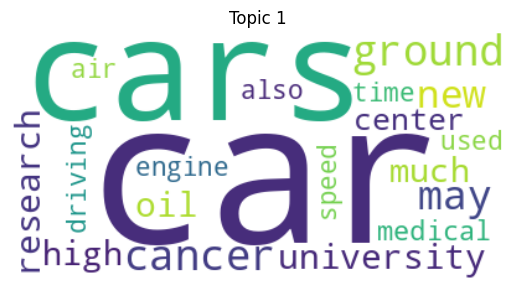

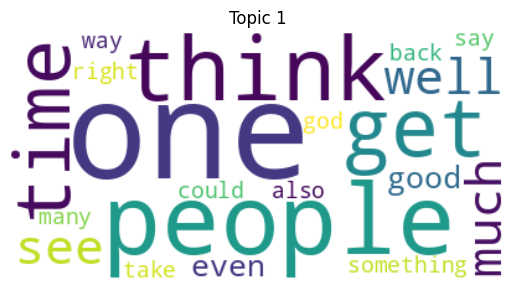

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordcloud(model, feature_names, topic_index):
    topic_words = model.components_[topic_index]
    word_freq = {feature_names[i]: topic_words[i] for i in topic_words.argsort()[-20:]}
    wc = WordCloud(background_color='white').generate_from_frequencies(word_freq)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_index + 1}")
    plt.show()

# Example: Show wordcloud for Topic 0 in LDA and NMF
plot_wordcloud(lda, count_vectorizer.get_feature_names_out(), 0)
plot_wordcloud(nmf, tfidf_vectorizer.get_feature_names_out(), 0)